In [35]:
#Import the libraries
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [36]:
d = pd.read_csv('RoadInc.csv')
d

,Unnamed: 0,Date,male,female,nk
0,1,20110101,1.0,0.0,0.0
1,2,20110101,1.0,0.0,0.0
2,3,20110101,1.0,0.0,0.0
3,4,20110101,1.0,0.0,0.0
4,5,20110101,1.0,0.0,0.0
...,...,...,...,...,...
85605,85606,20140420,1.0,0.0,0.0
85606,85607,20140302,1.0,0.0,0.0
85607,85608,20140804,0.0,1.0,0.0
85608,85609,20140321,1.0,0.0,0.0


In [37]:
d['Date'] = pd.to_datetime(d['Date'],format = ('%Y%m%d'))
d = d.set_index(['Date'])

In [38]:
d

,Unnamed: 0,male,female,nk
Date,,,,
2011-01-01,1,1.0,0.0,0.0
2011-01-01,2,1.0,0.0,0.0
2011-01-01,3,1.0,0.0,0.0
2011-01-01,4,1.0,0.0,0.0
2011-01-01,5,1.0,0.0,0.0
...,...,...,...,...
2014-04-20,85606,1.0,0.0,0.0
2014-03-02,85607,1.0,0.0,0.0
2014-08-04,85608,0.0,1.0,0.0


In [39]:
d['People'] = d['female'] + d['male'] + d['nk']

In [54]:
y = d['People'].resample('w').sum()
y

Date
2011-01-02    206.0
2011-01-09    433.0
2011-01-16    416.0
2011-01-23    437.0
2011-01-30    452.0
              ...  
2014-12-07    396.0
2014-12-14    408.0
2014-12-21    469.0
2014-12-28    465.0
2015-01-04    213.0
Freq: W-SUN, Name: People, Length: 210, dtype: float64

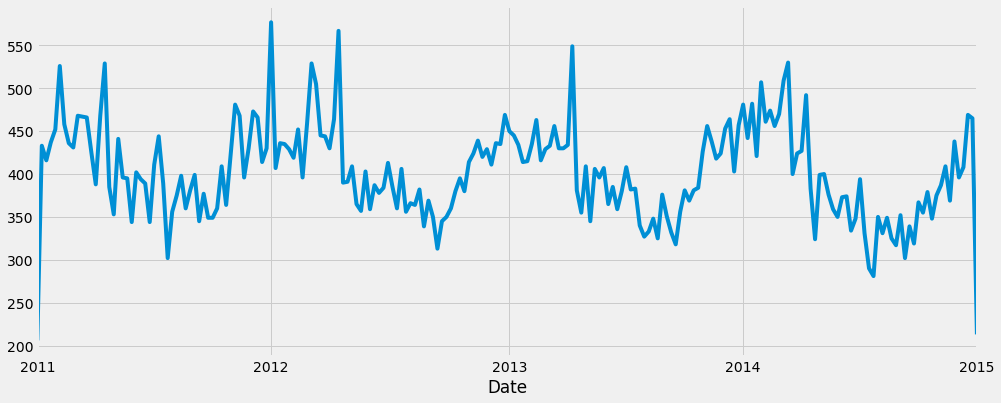

In [52]:
y.plot(figsize=(15, 6))
plt.show()

In [14]:
#Creating the training data set
p=d=q= range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]
print('Examples of parameter combinations for seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1],seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2],seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2],seasonal_pdq[4]))

Examples of parameter combinations for seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [15]:
warnings.filterwarnings("ignore")

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,
                                           enforce_stationarity=False,
                                           enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3106.3216804934373
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2715.205593967576
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2244.0560678957354
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2038.1186704618503
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2262.3732532387403
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2166.6040624998004
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2113.4450064355715
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2038.8838071372886
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2842.721767498851
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2548.754460873048
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2188.1663864319607
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1976.7176115211284
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2220.041579224515
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2106.134008397004
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2059.943390888958
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1978.716653225674
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2212.287798667351
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2091.2777275527883


In [16]:
mod = sm.tsa.statespace.SARIMAX(y,order=(1,1,1),
                               seasonal_order =(1,1,1,12),
                               enforce_stationarity = False,
                               enforce_invertibility = False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0926      0.104      0.892      0.373      -0.111       0.296
ma.L1         -0.6823      0.083     -8.206      0.000      -0.845      -0.519
ar.S.L12    4.778e-05      0.075      0.001      0.999      -0.147       0.147
ma.S.L12      -1.0000      0.075    -13.410      0.000      -1.146      -0.854
sigma2      1773.2501   4.21e-05   4.22e+07      0.000    1773.250    1773.250


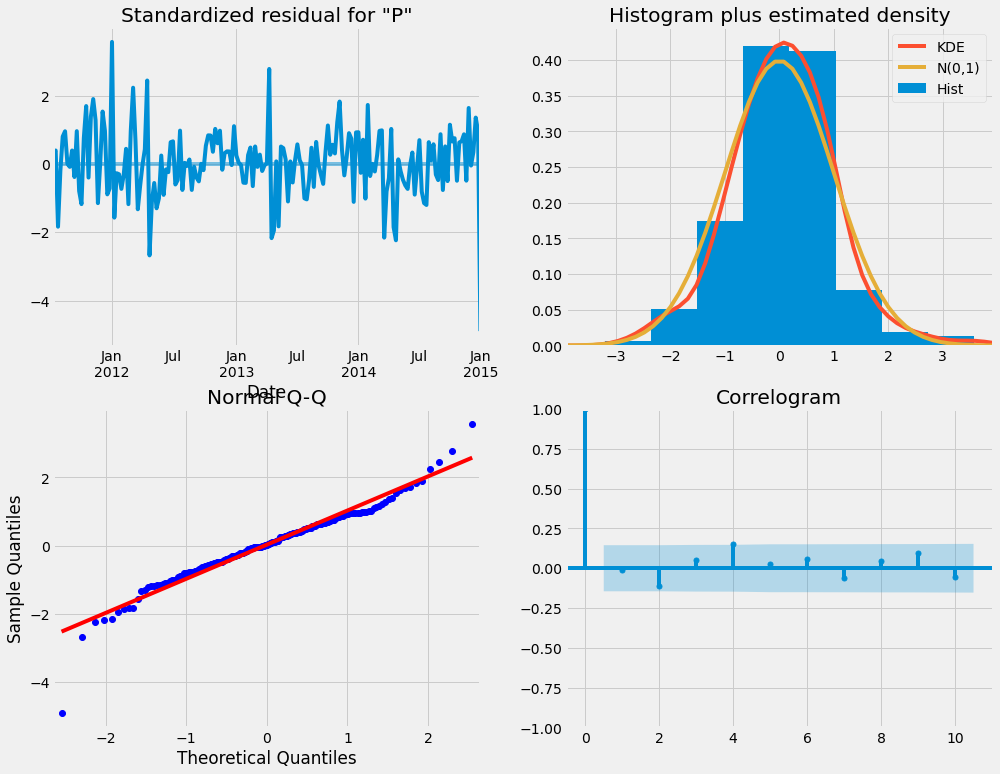

In [17]:
results.plot_diagnostics(figsize=(15,12))
plt.show()

In [24]:
pred = results.get_prediction(start=pd.to_datetime('2012-01-01'),dynamic=False)
pred_ci = pred.conf_int()

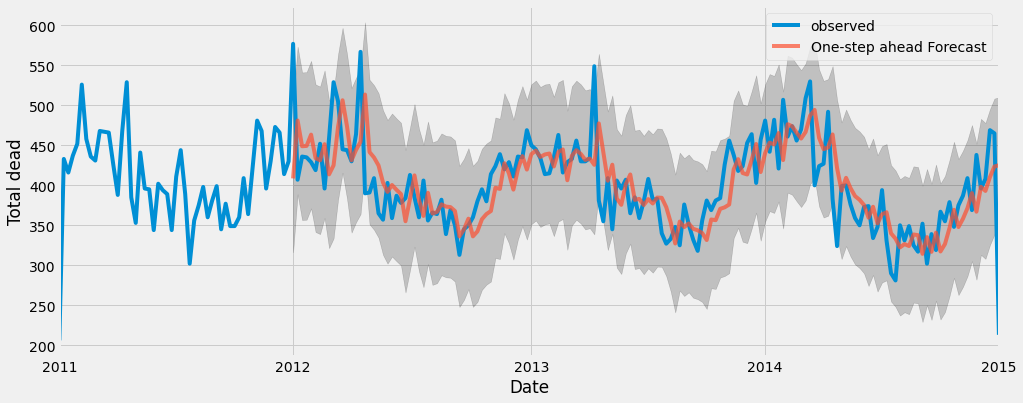

In [25]:
plt.figure(figsize=(15, 6))
ax = y['2011':].plot(label='observed')
pred.predicted_mean.plot(ax = ax,label='One-step ahead Forecast',alpha=.7)
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1],color='k',alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Total dead')

plt.legend()
plt.show()

In [26]:
y_forecasted = pred.predicted_mean
y_truth = y['2012-01-01':]

mse = ((y_forecasted - y_truth) **2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse,2)))

The Mean Squared Error of our forecasts is 1991.72


In [27]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2012-01-01'),dynamic=True, full_result=True)
pred_dynamic_ci = pred_dynamic.conf_int()


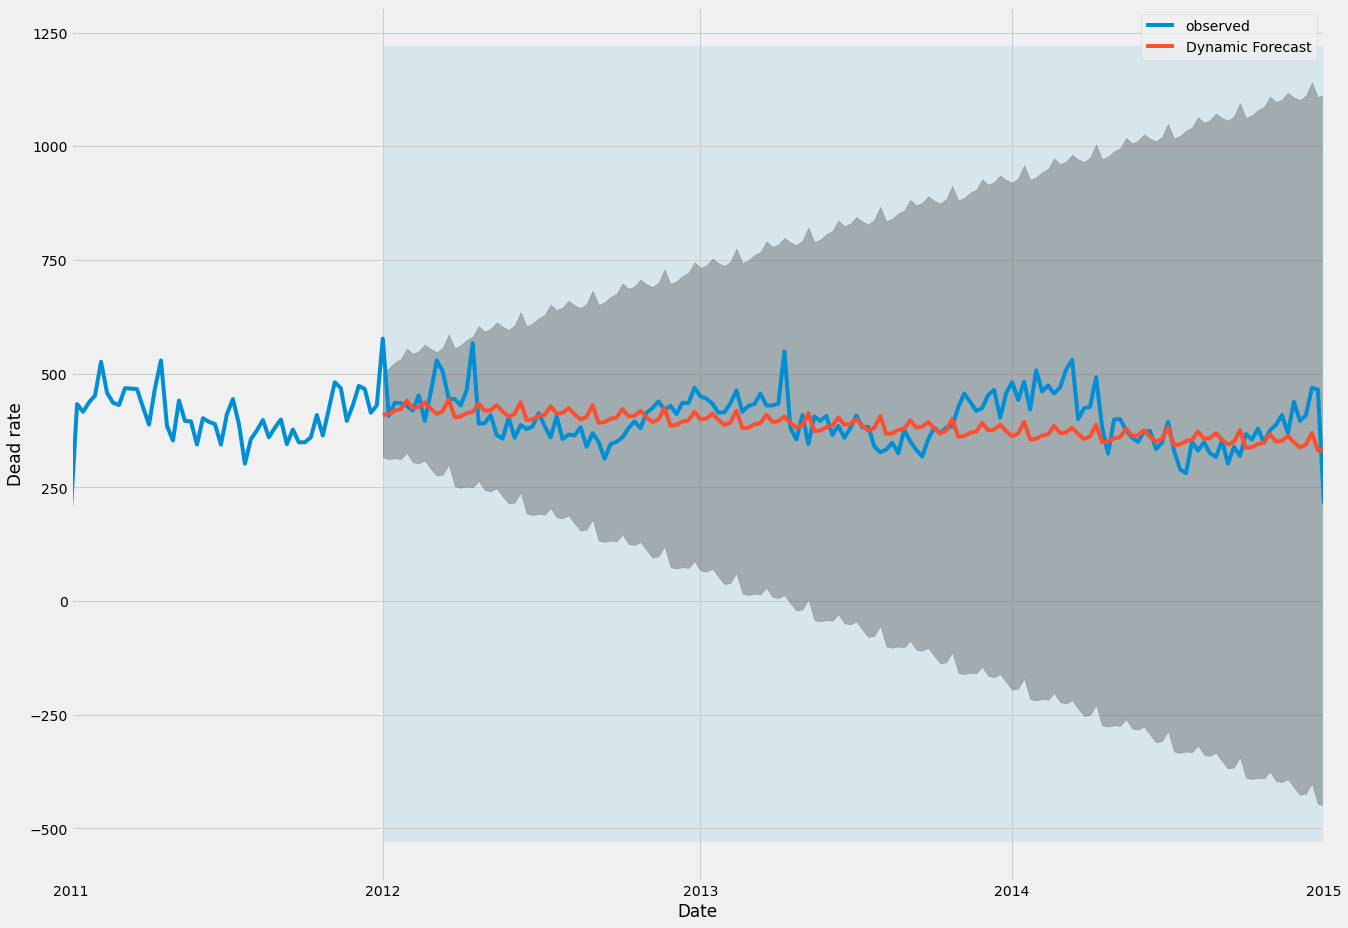

In [28]:
plt.figure(figsize=(15,6))
ax = y['2011':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2012-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Dead rate')
plt.legend()
plt.show()

In [29]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['2012-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 3236.15


In [30]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=50)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()


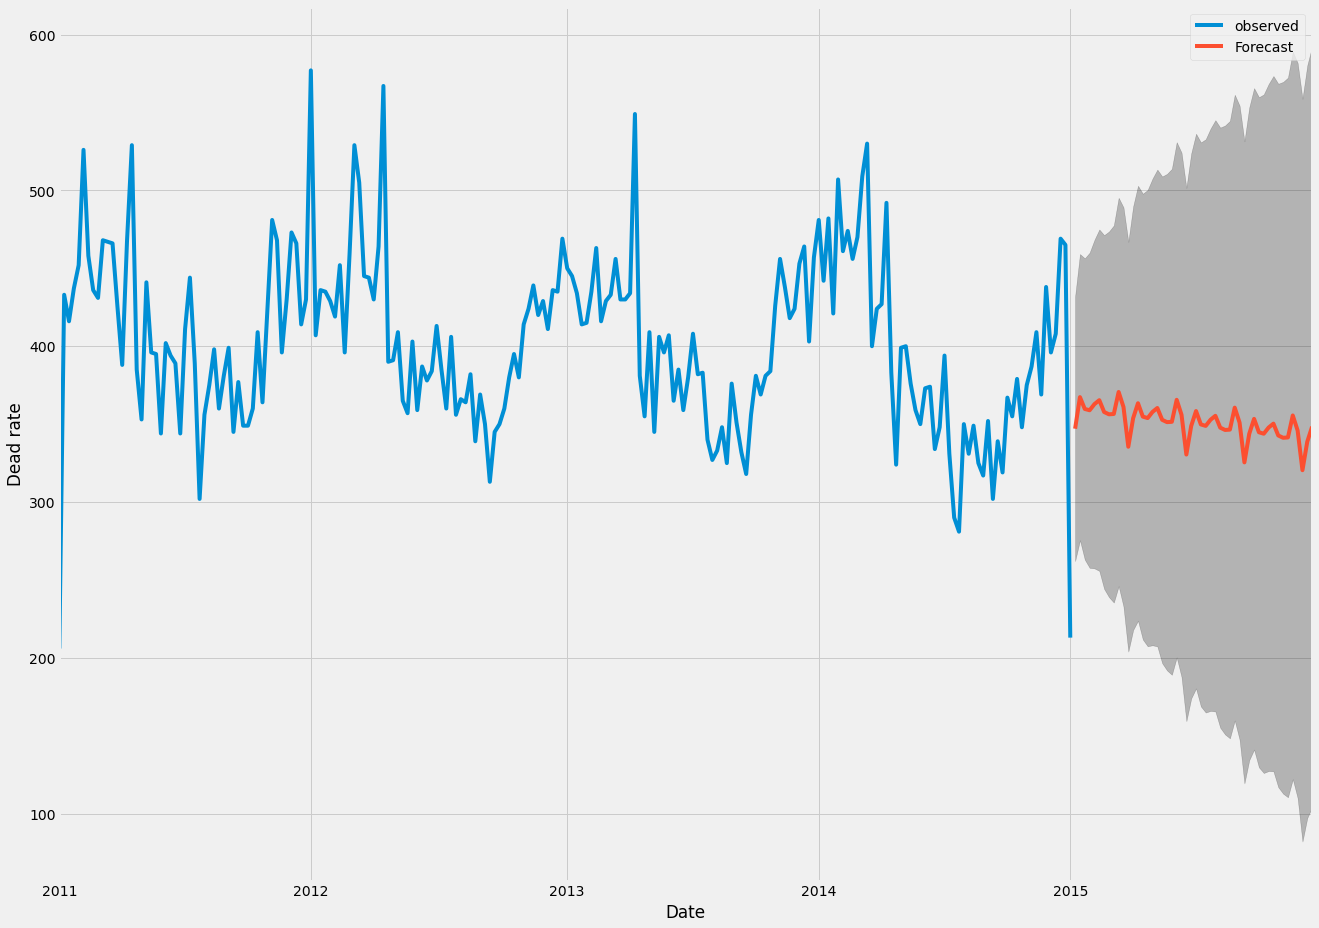

In [32]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Dead rate')

plt.legend()
plt.show()
